# Question 1

# Minimization of Negative Log Likelihood with Softmax outputs


**We are given the negative log likelihood function that we want to minimize:**

$J(w)= - \log(\prod_n \prod_{m=0}^9 p(t_n=m|x_n;w))$

where there are 0 to 9 classes.

**Now let us define that $p(t_m|x;w)$ is a categorical probability distribution that is :**

$p(t_m|x;w) = y_m(x;w)^{t_m}$

following the constraints that $t_m \in \{0,1\} and \sum_m t_m=1$

**As we know that we can interpret the output of the softmax as the probabilities that a certain set of features belongs to a certain class. Let us use the probability nodes as softmax output nodes**

$y_i(x;w)=\frac{\exp^{y_i(x;w)}}{\sum_{j=0}^m \exp^{y_j(x;w)}}$

**This ensures that sum of probability of each feature sample belonging to one of the 10 classes equals to 1**

**The negative log likelihood can be reduced to :**

$J(w)= - \sum_n \sum_{m=0}^9 \log p(t_n=m|x_n;w)$

$J(w)= - \sum_n \sum_{m=0}^9 t_m^{(n)} \log (y_m^{(n)}(x^{(n)};w))$

**Now the nature of curve of negative log likelihood is :**

<img src="neglog.PNG" width="300" height="300">


**This means for the curve to reach its minimum we have to generate the likelihood of the correct label as close to 1 as possible.**

**Now noting that $t_m$ is one-hot encoded vector thus reducing all terms of J(w) to 0 other than the target(true) class say 'k' for every feature vector i.e.**

$J(w)= - \sum_n 1 * \log (y_k^{(n)}(x^{(n)};w)) = - \log (\prod_n   (y_k^{(n)}(x^{(n)};w)))$

**Thus the weights must be trained in such a way that the likelihood softmax(probability) of the target label is maximum for each feature vector (i.e. close to 1).**

**Hence it is proved that a neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set**






# Interpretation of L2 regularization

**Let us assume that our input is linearly correlated with our output using the following equation**

$y_i=wx_i+\epsilon$

**where w is the set of weights and $\epsilon$ is the random noise that also follows normal distribution with 0 mean and constant variance $\sigma^2$.**

**This gives us the likelihood that we want to maximize:**

$\prod_{i=1}^{N} \mathcal{N}(y_i;x_i,w,\sigma^2)$

**Now,let us assume that $w$ has the Gaussian prior $\mathcal{N}(0,\alpha^{-1})$**

**From Bayes Rule we know:**

$P(w|D)=\frac{P(D|w)P(w)}{P(D)}$

$P(w|D)\approx {P(D|w)P(w)}$

**Thus the posterior probability is:**

$P(w|D) = \prod_{i=1}^{N} \mathcal{N}(y_i;x_i,w,\sigma^2) \mathcal{N}(0,\alpha^{-1})$

**Taking logarithm of the posterior:**

$\log P(w|D) = \sum_{i=1}^{N} \log \mathcal{N}(y_i;x_i,w,\sigma^2) + \log \mathcal{N}(0,\alpha^{-1}) + constant$

**Ignoring the constant we need to maximize over $w$**

$-\frac{1}{\sigma^2} \sum_{i=1}^{N} (y_i - wx_i)^2 -\alpha w^2$

**This is the same as minimizing the cost function with L2 regularization with $\alpha$ being the regularization constant.**

**Thus we have proved optimizing model weights to minimize loss function with L2 regularization is equivalent to finding the weights that are most likely under a posterior distribution evaluated using Bayes rule, with a zero-mean independent Gaussian weights prior**




In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

**Reshaping and normalizing the data**

In [5]:
x_train=x_train.reshape((60000,784))

x_test=x_test.reshape((10000,784))


In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

**Generating 1000 images with 100 images per class**

In [8]:
def generate_minidata(x,y):
    
  mini=[]

  for i in range(10):
    count=0
    for j in range(len(x)):
      if y[j]==i:
        mini.append(np.array([i]+list(x[j])))
        count+=1
      if count==100:
        break
  
  mini=np.array(mini)
  np.random.shuffle(mini)
  #return(mini[:,0].reshape((len(mini),1)),mini[:,1:])
  return(mini[:,0],mini[:,1:])

In [9]:
mini_trainlabels,mini_train=generate_minidata(x_train,y_train)

In [10]:
mini_testlabels,mini_test=generate_minidata(x_test,y_test)

In [11]:
mini_train.shape,mini_trainlabels.shape

((1000, 784), (1000,))

In [12]:
mini_test.shape,mini_testlabels.shape

((1000, 784), (1000,))

**One hot encoding**

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
train_labels = ohe.fit_transform(mini_trainlabels.reshape((1000,1))).toarray()
test_labels = ohe.fit_transform(mini_testlabels.reshape((1000,1))).toarray()

In [16]:
print(mini_test.shape,test_labels.shape)

(1000, 784) (1000, 10)


In [17]:
print(mini_train.shape,train_labels.shape)

(1000, 784) (1000, 10)


# Question 2)a) 1 Hidden Layer

In [31]:
def neural_net_1hidden(l2):
    
    model = tf.keras.Sequential()
    
    if l2==True:
        model.add(tf.keras.layers.Dense(30, input_dim=784,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
        
    else:
        model.add(tf.keras.layers.Dense(30, input_dim=784,activation='sigmoid'))
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.summary()
    
    adam=tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

**One hidden layer without regularization**

In [19]:
model=neural_net_1hidden(False)
history = model.fit(mini_train, train_labels, epochs=30, batch_size=10,validation_data=(mini_test,test_labels))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.3298 - accuracy: 0.5870 - val_loss: 1.2903 - val_accuracy: 0.5730
Epoch 2/30
1000/1000 [==============================] - 0s 316us/sample - loss: 0.8941 - accuracy: 0.7260 - val_loss: 1.1346 - val_accuracy: 0.6490
Epoch 3/30
1000/1000 [==============================] - 0s 317us/sample - loss: 0.8239 - accuracy: 0.7640 - val_loss: 1.1899 - val_accuracy: 0.6460
Epoch 4/30
1000/1000 [==

In [20]:
import matplotlib.pyplot as plt

def model_training_plot():
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    

**Plot of criterion categorical cross entropy loss function**

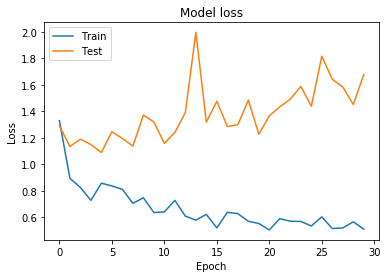

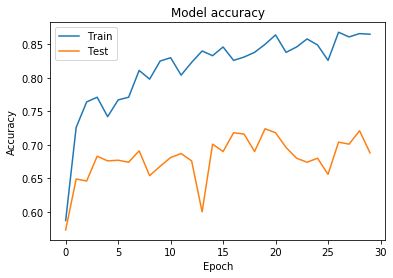

In [21]:
model_training_plot()

In [22]:
def for_error_plot(model):
    
    train_errors=[]
    test_errors=[]
    train_accuracy=[]
    test_accuracy=[]

    for i in range(30):
    
        model.fit(mini_train, train_labels, epochs=1, batch_size=10)
        
        predictions_train=model.predict_classes(mini_train)
        
        predictions_test=model.predict_classes(mini_test)
        
        te=0
        tr=0
        for i in range(1000):
            if train_labels[i][predictions_train[i]]==1:
                tr+=1
            if test_labels[i][predictions_test[i]]==1:
                te+=1
                
        train_errors.append(1-tr/1000)
        test_errors.append(1-te/1000)
        
        train_accuracy.append(tr/1000)
        test_accuracy.append(te/1000)
        
    return train_errors,test_errors,train_accuracy,test_accuracy
        
        


In [23]:
model=neural_net_1hidden(False)
traine,teste,traina,testa=for_error_plot(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 525us/sample - loss: 1.3550 - accuracy: 0.6010
Train on 1000 samples
1000/1000 [==============================] - 0s 190us/sample - loss: 0.8118 - accuracy: 0.7450
Train on 1000 samples
1000/1000 [==============================] - 0s 188us/sample - loss: 0.8000 - accuracy: 0.7720
Train on 1000 samples
1000/1000 [==============================] - 0s 209us/sample - loss: 0.7834 - accuracy: 0.7830
Train on 1000 samples
1000/1000 [===========

In [24]:
import matplotlib.pyplot as plt
def zero_one_error_plot(x,y,a,b):
    # Plot training & validation loss values
    plt.plot(x)
    plt.plot(y)
    plt.title('Model Error')
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    plt.plot(a)
    plt.plot(b)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

**Plot of zero-one error**

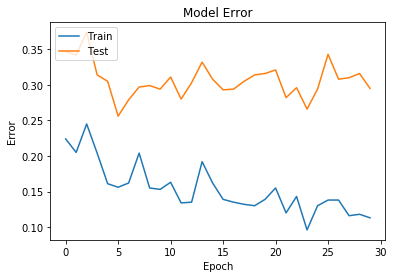

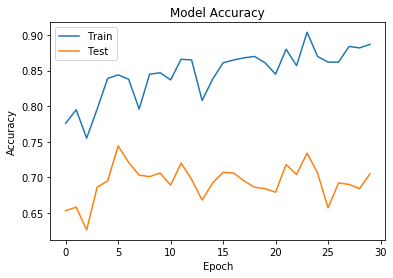

In [25]:
zero_one_error_plot(traine,teste,traina,testa)

In [26]:
def learning_rate_plot(params,model):
    
    learning_rate=[]

    for i in range(30):
        old_weights=model.get_weights()
    
        model.fit(mini_train, train_labels, epochs=1, batch_size=10)
    
        new_weights=model.get_weights()
        
        summation=0
        
        for j in range(len(new_weights)):
            diff=np.sum(np.absolute((old_weights[j]-new_weights[j])/new_weights[j]))
            summation+=diff
            
        learning_rate.append(summation/params)
        
    # Plot learning rate
    plt.plot(learning_rate)
    plt.title('Learning rate')
    plt.ylabel('Rate')
    plt.xlabel('Epoch')
    plt.show()



**Learning speed of hidden layer**

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 525us/sample - loss: 1.3328 - accuracy: 0.5860
Train on 1000 samples
1000/1000 [==============================] - 0s 194us/sample - loss: 0.8527 - accuracy: 0.7260
Train on 1000 samples
1000/1000 [==============================] - 0s 180us/sample - loss: 0.7924 - accuracy: 0.7580
Train on 1000 samples
1000/1000 [==============================] - 0s 178us/sample - loss: 0.7943 - accuracy: 0.7660
Train on 1000 samples
1000/1000 [===========

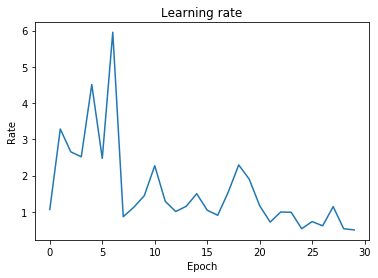

In [28]:
model=neural_net_1hidden(False)
learning_rate_plot(23860,model)

**One hidden layer with regularization**

**With criterion function loss**

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 818us/sample - loss: 30.7975 - accuracy: 0.1440 - val_loss: 3.2870 - val_accuracy: 0.2530
Epoch 2/30
1000/1000 [==============================] - 0s 335us/sample - loss: 4.1948 - accuracy: 0.1780 - val_loss: 4.4483 - val_accuracy: 0.0910
Epoch 3/30
1000/1000 [==============================] - 0s 419us/sample - loss: 4.5490 - accuracy: 0.1870 - val_loss: 6.2060 - val_accuracy: 0.1130
Epoch 4/30
1000/100

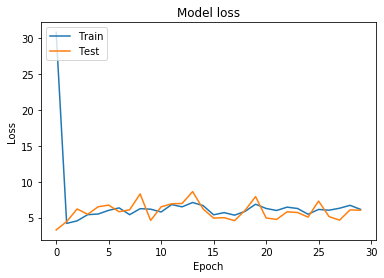

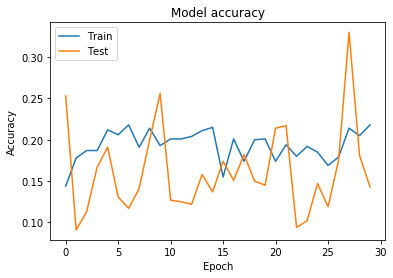

In [32]:
model=neural_net_1hidden(True)
history = model.fit(mini_train, train_labels, epochs=30, batch_size=10,validation_data=(mini_test,test_labels))
model_training_plot()

**Zero-one Error**

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 756us/sample - loss: 30.8283 - accuracy: 0.1350
Train on 1000 samples
1000/1000 [==============================] - 0s 259us/sample - loss: 4.3015 - accuracy: 0.1640
Train on 1000 samples
1000/1000 [==============================] - 0s 238us/sample - loss: 5.2170 - accuracy: 0.2010
Train on 1000 samples
1000/1000 [==============================] - 0s 186us/sample - loss: 4.8569 - accuracy: 0.1790
Train on 1000 samples
1000/1000 [==========

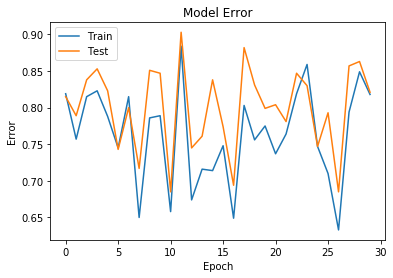

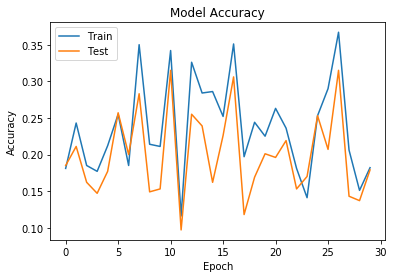

In [33]:
model=neural_net_1hidden(True)
traine,teste,traina,testa=for_error_plot(model)
zero_one_error_plot(traine,teste,traina,testa)

**Learning rate plot**

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 572us/sample - loss: 30.8666 - accuracy: 0.1610
Train on 1000 samples
1000/1000 [==============================] - 0s 246us/sample - loss: 4.2672 - accuracy: 0.1750
Train on 1000 samples
1000/1000 [==============================] - 0s 184us/sample - loss: 5.1633 - accuracy: 0.2090
Train on 1000 samples
1000/1000 [==============================] - 0s 185us/sample - loss: 5.4903 - accuracy: 0.2090
Train on 1000 samples
1000/1000 [==========

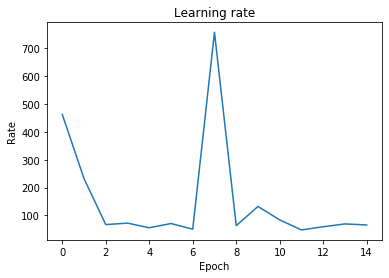

In [34]:
model=neural_net_1hidden(True)
learning_rate_plot(23860,model)

# Question 2)b) 2 and 3 hidden Layers

In [35]:
def neural_net_2hidden(l2):

    model = tf.keras.Sequential()
    if l2==True:
        model.add(tf.keras.layers.Dense(30, input_dim=784,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
        model.add(tf.keras.layers.Dense(30, input_dim=30,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
    else:
        model.add(tf.keras.layers.Dense(30, input_dim=784,activation='sigmoid'))
        model.add(tf.keras.layers.Dense(30, input_dim=30,activation='sigmoid'))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.summary()
    
    adam=tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

**Two hidden layers without regularization**

In [36]:
model=neural_net_2hidden(False)
history = model.fit(mini_train, train_labels, epochs=30, batch_size=10,validation_data=(mini_test,test_labels))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_16 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 826us/sample - loss: 1.6937 - accuracy: 0.4290 - val_loss: 1.3850 - val_accuracy: 0.5760
Epoch 2/30
1000/1000 [==============================] - 0s 328us/sample - loss: 1.1888 - accuracy: 0.5890 - val_loss: 1.2996 - val_accuracy: 0.5610
Epoch 3/30
1000/1000 [==============

**Plot for criterion function loss**

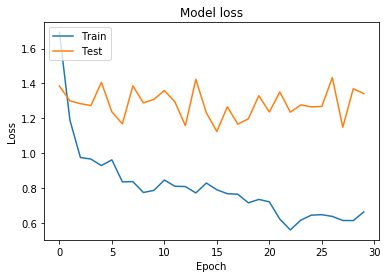

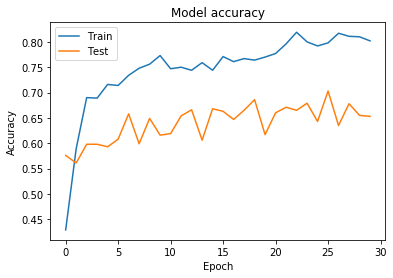

In [37]:
model_training_plot()

**Plot for zero-one error**

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_19 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 558us/sample - loss: 1.8175 - accuracy: 0.3470
Train on 1000 samples
1000/1000 [==============================] - 0s 188us/sample - loss: 1.1615 - accuracy: 0.5880
Train on 1000 samples
1000/1000 [==============================] - 0s 194us/sample - loss: 0.9782 - accuracy: 0.6580
Train on 1000 samples
1000/10

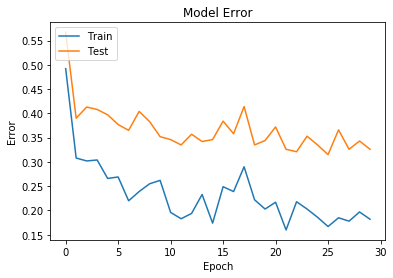

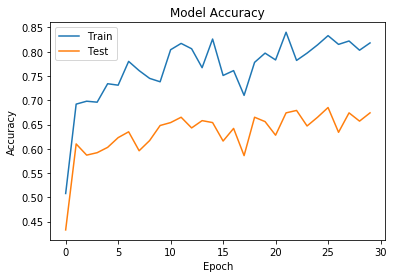

In [38]:
model=neural_net_2hidden(False)
traine,teste,traina,testa=for_error_plot(model)
zero_one_error_plot(traine,teste,traina,testa)

**Plot for learning rate**

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_25 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 638us/sample - loss: 1.5793 - accuracy: 0.4430
Train on 1000 samples
1000/1000 [==============================] - 0s 208us/sample - loss: 1.0365 - accuracy: 0.6630
Train on 1000 samples
1000/1000 [==============================] - 0s 229us/sample - loss: 0.9198 - accuracy: 0.6940
Train on 1000 samples
1000/1

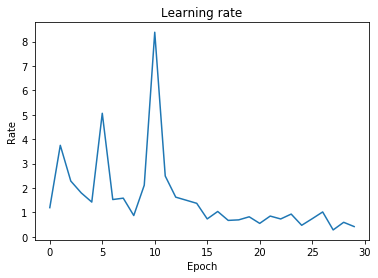

In [40]:
model=neural_net_2hidden(False)
learning_rate_plot(24790,model)

**Two hidden layers with regularization**

In [41]:
model=neural_net_2hidden(True)
history = model.fit(mini_train, train_labels, epochs=30, batch_size=10,validation_data=(mini_test,test_labels))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_28 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 886us/sample - loss: 35.4528 - accuracy: 0.0970 - val_loss: 2.3400 - val_accuracy: 0.1000
Epoch 2/30
1000/1000 [==============================] - 0s 380us/sample - loss: 2.3353 - accuracy: 0.1010 - val_loss: 2.3166 - val_accuracy: 0.1000
Epoch 3/30
1000/1000 [============

**Plot for criterion function loss**

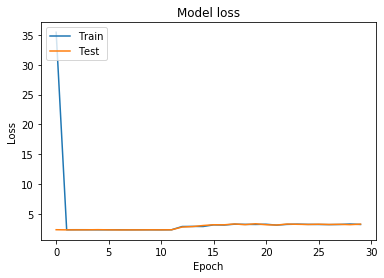

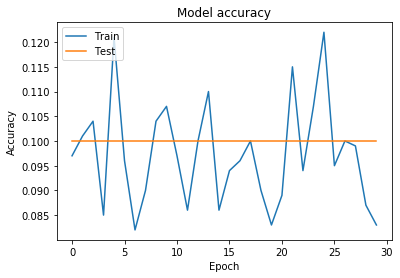

In [42]:
model_training_plot()

**Plot for zero-one error**

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_31 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 665us/sample - loss: 35.3744 - accuracy: 0.1210
Train on 1000 samples
1000/1000 [==============================] - 0s 225us/sample - loss: 2.3323 - accuracy: 0.0900
Train on 1000 samples
1000/1000 [==============================] - 0s 237us/sample - loss: 2.3320 - accuracy: 0.0820
Train on 1000 samples
1000/

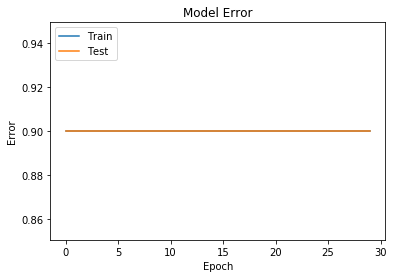

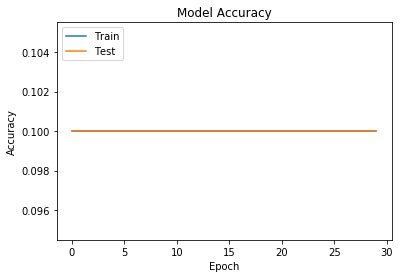

In [43]:
model=neural_net_2hidden(True)
traine,teste,traina,testa=for_error_plot(model)
zero_one_error_plot(traine,teste,traina,testa)

**Plot for learning rate**

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_34 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 637us/sample - loss: 35.4035 - accuracy: 0.1010
Train on 1000 samples
1000/1000 [==============================] - 0s 195us/sample - loss: 2.3344 - accuracy: 0.0970
Train on 1000 samples
1000/1000 [==============================] - 0s 195us/sample - loss: 2.3330 - accuracy: 0.1030
Train on 1000 samples
1000/

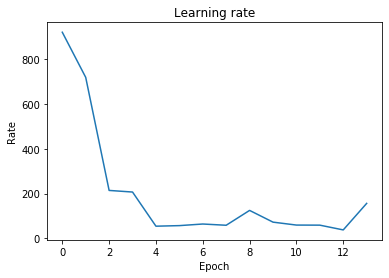

In [44]:
model=neural_net_2hidden(True)
learning_rate_plot(24790,model)

In [45]:
def neural_net_3hidden(l2):

    model = tf.keras.Sequential()
    if l2==True:
        model.add(tf.keras.layers.Dense(30, input_dim=784,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
        model.add(tf.keras.layers.Dense(30, input_dim=30,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
        model.add(tf.keras.layers.Dense(30, input_dim=30,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
    
    else:
        model.add(tf.keras.layers.Dense(30, input_dim=784,activation='sigmoid'))
        model.add(tf.keras.layers.Dense(30, input_dim=30,activation='sigmoid'))
        model.add(tf.keras.layers.Dense(30, input_dim=30,activation='sigmoid'))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.summary()
    
    adam=tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

**3 hidden layers without regularization**

**Plot for Criterion Function Loss**

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_37 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_38 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 883us/sample - loss: 2.3430 - accuracy: 0.1030 - val_loss: 2.0410 - val_accuracy: 0.2320
Epoch 2/30
1000/1000 [=============================

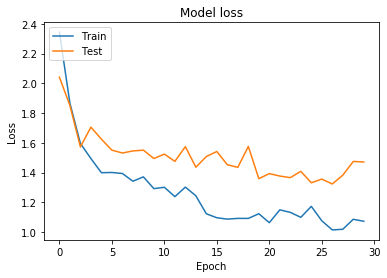

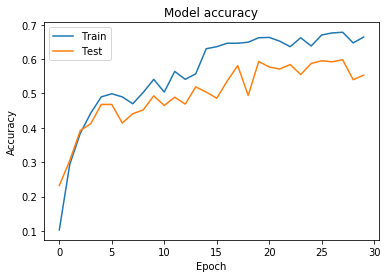

In [46]:
model=neural_net_3hidden(False)
history = model.fit(mini_train, train_labels, epochs=30, batch_size=10,validation_data=(mini_test,test_labels))
model_training_plot()

**Plot for zero-one error**

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_41 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_42 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_43 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 631us/sample - loss: 2.1298 - accuracy: 0.1890
Train on 1000 samples
1000/1000 [==============================] - 0s 201us/sample - loss: 1.5915 - accuracy: 0.3680
Train on 1000

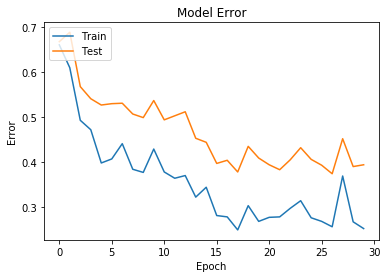

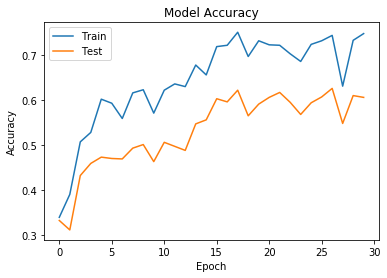

In [47]:
model=neural_net_3hidden(False)
traine,teste,traina,testa=for_error_plot(model)
zero_one_error_plot(traine,teste,traina,testa)

**Plot for learning rate**

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_45 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_46 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_47 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 647us/sample - loss: 2.1075 - accuracy: 0.2030
Train on 1000 samples
1000/1000 [==============================] - 0s 228us/sample - loss: 1.5866 - accuracy: 0.3830
Train on 1000

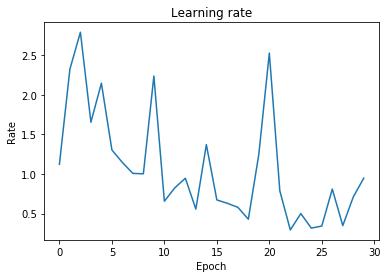

In [48]:
model=neural_net_3hidden(False)
learning_rate_plot(25720,model)

**3 hidden layers with regularization**

In [49]:
model=neural_net_3hidden(True)
history = model.fit(mini_train, train_labels, epochs=30, batch_size=10,validation_data=(mini_test,test_labels))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_49 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_50 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 1ms/sample - loss: 40.2314 - accuracy: 0.0870 - val_loss: 2.3294 - val_accuracy: 0.1000
Epoch 2/30
1000/1000 [==============================

**Plot for criterion function loss**

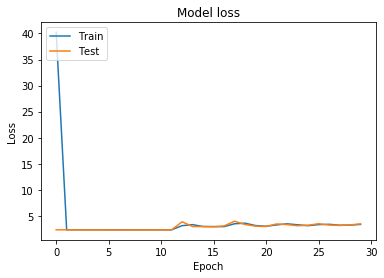

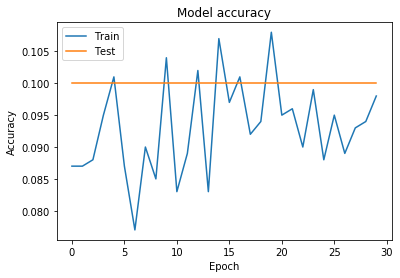

In [50]:
model_training_plot()

**Plot for zero-one error**

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_53 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_54 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_55 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 750us/sample - loss: 40.4962 - accuracy: 0.1090
Train on 1000 samples
1000/1000 [==============================] - 0s 226us/sample - loss: 2.3453 - accuracy: 0.1090
Train on 100

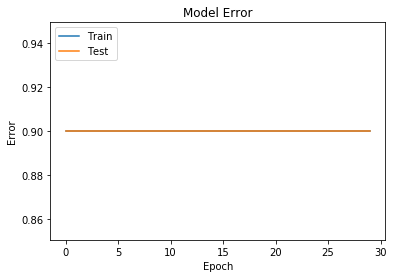

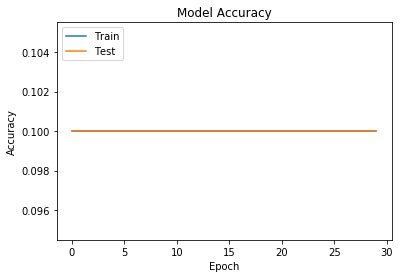

In [51]:
model=neural_net_3hidden(True)
traine,teste,traina,testa=for_error_plot(model)
zero_one_error_plot(traine,teste,traina,testa)

**Plot for learning rate**

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_57 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_58 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_59 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
1000/1000 [==============================] - 1s 743us/sample - loss: 40.6000 - accuracy: 0.0870
Train on 1000 samples
1000/1000 [==============================] - 0s 213us/sample - loss: 2.3403 - accuracy: 0.0950
Train on 100

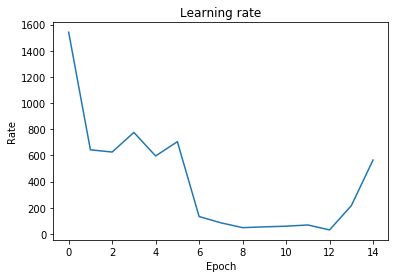

In [52]:
model=neural_net_3hidden(True)
learning_rate_plot(25720,model)

# Question 2)c) CNN

In [53]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [64]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 10, 10, 64)       

In [66]:
mini_train=mini_train.reshape((1000,28,28,1))
mini_test=mini_test.reshape((1000,28,28,1))

In [67]:
mini_train.shape,mini_test.shape

((1000, 28, 28, 1), (1000, 28, 28, 1))

In [68]:
train_labels.shape,test_labels.shape

((1000, 10), (1000, 10))

In [69]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])

In [70]:
train_gen = ImageDataGenerator(rotation_range=3, width_shift_range=3, height_shift_range=3) 

test_gen = ImageDataGenerator()

In [71]:
train_generator = train_gen.flow(mini_train, train_labels, batch_size=10)
test_generator = test_gen.flow(mini_test, test_labels, batch_size=10)

In [72]:
history=model.fit_generator(train_generator, steps_per_epoch=1000//10, epochs=30, validation_data=test_generator, validation_steps=1000//10)


Epoch 1/30
100/100 [==============================] - 5s 49ms/step - loss: 13943718.7768 - accuracy: 0.1110 - val_loss: 16028184.0000 - val_accuracy: 0.1260
Epoch 2/30
100/100 [==============================] - 4s 44ms/step - loss: 5529694.5050 - accuracy: 0.2920 - val_loss: 788680.6250 - val_accuracy: 0.3530
Epoch 3/30
100/100 [==============================] - 4s 44ms/step - loss: 451844.4041 - accuracy: 0.5000 - val_loss: 159742.6250 - val_accuracy: 0.6720
Epoch 4/30
100/100 [==============================] - 4s 44ms/step - loss: 222572.9458 - accuracy: 0.5340 - val_loss: 352928.4062 - val_accuracy: 0.7220
Epoch 5/30
100/100 [==============================] - 4s 43ms/step - loss: 248917.9212 - accuracy: 0.5380 - val_loss: 259498.5000 - val_accuracy: 0.5210
Epoch 6/30
100/100 [==============================] - 5s 45ms/step - loss: 184655.6699 - accuracy: 0.5590 - val_loss: 90099.7891 - val_accuracy: 0.6240
Epoch 7/30
100/100 [==============================] - 5s 46ms/step - loss: 144

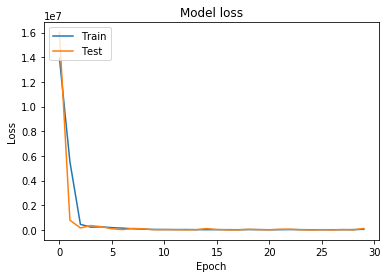

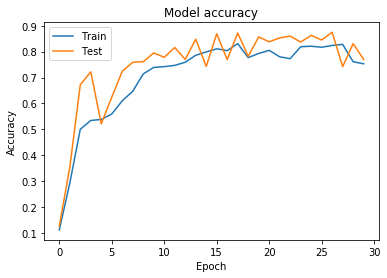

In [73]:
model_training_plot()

**References :**

https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/

https://rohanvarma.me/Regularization/

https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/